In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/time-series-starter-dataset/Month_Value_1.csv


In [2]:
data = pd.read_csv("/kaggle/input/time-series-starter-dataset/Month_Value_1.csv", index_col='Period', parse_dates=True)
print(data.head())

                 Revenue  Sales_quantity  Average_cost  \
Period                                                   
2015-01-01  1.601007e+07         12729.0   1257.763541   
2015-01-02  1.580759e+07         11636.0   1358.507000   
2015-01-03  2.204715e+07         15922.0   1384.697024   
2015-01-04  1.881458e+07         15227.0   1235.606705   
2015-01-05  1.402148e+07          8620.0   1626.621765   

            The_average_annual_payroll_of_the_region  
Period                                                
2015-01-01                                30024676.0  
2015-01-02                                30024676.0  
2015-01-03                                30024676.0  
2015-01-04                                30024676.0  
2015-01-05                                30024676.0  


In [3]:
data.dropna().describe()

,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
count,6.400000e+01,64.000000,64.000000,6.400000e+01
mean,3.236045e+07,19197.375000,1695.061159,2.869083e+07
std,1.164150e+07,6591.287257,296.844793,1.057191e+06
min,1.402148e+07,8314.000000,1110.576805,2.740647e+07
25%,2.242655e+07,15065.500000,1499.142841,2.782857e+07
50%,3.209088e+07,18368.000000,1654.399798,2.819785e+07
75%,3.992999e+07,22856.250000,1916.401096,2.987852e+07
max,5.875647e+07,38069.000000,2559.328184,3.002468e+07


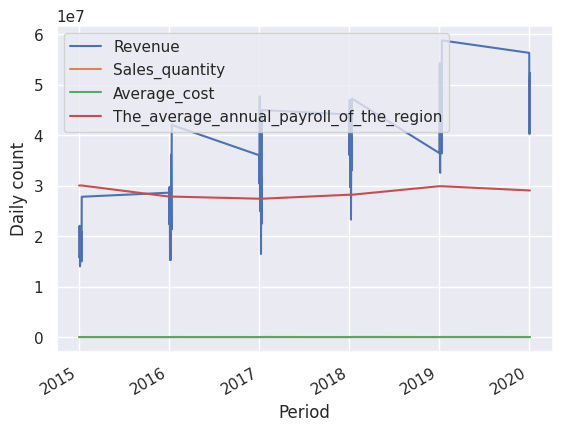

In [4]:
import matplotlib.pyplot as plt
import seaborn
seaborn.set()
data.plot()
plt.ylabel("Daily count")
plt.show()

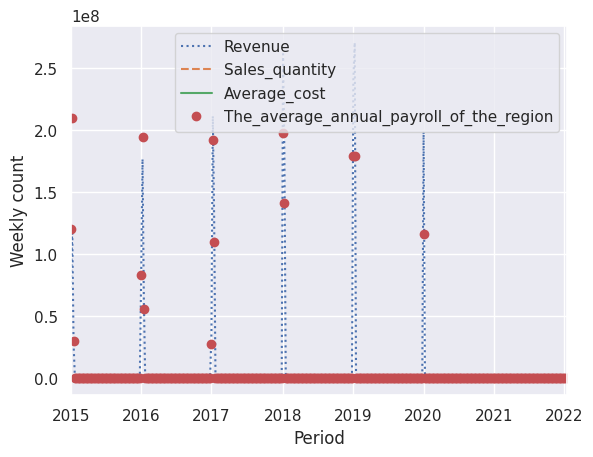

In [5]:
weekly = data.resample("W").sum()
weekly.plot(style=[':', '--', '-', 'o'])
plt.ylabel('Weekly count')
plt.show()

/tmp/ipykernel_13/2698780050.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = data.resample("M").sum()


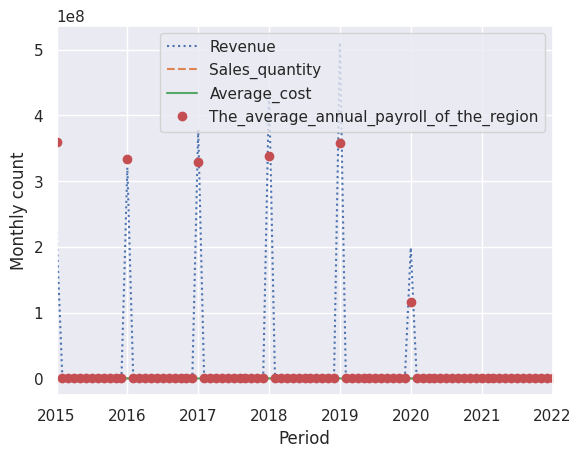

In [6]:
monthly = data.resample("M").sum()
monthly.plot(style=[':', '--', '-', 'o'])
plt.ylabel('Monthly count')
plt.show()

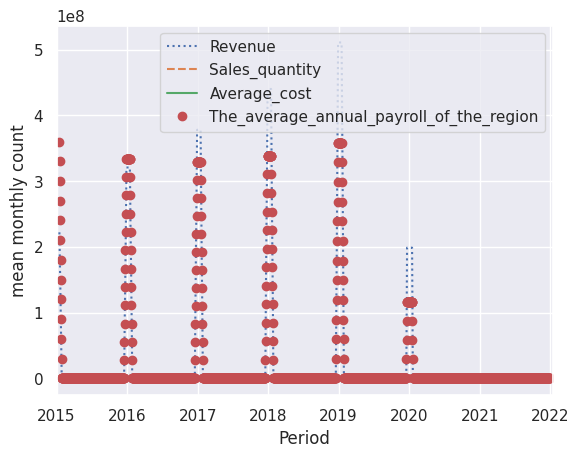

In [7]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-', 'o'])
plt.ylabel('mean monthly count')
plt.show()

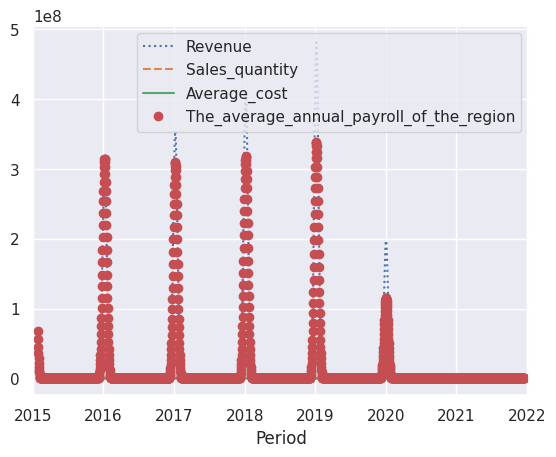

In [8]:
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':','--', '-', 'o'])
plt.show()

Revenue appears to show periodic peaks, possibly correlating with seasonal trends or significant market events.
Sales quantity revenue patterns, suggesting that changes in sales volume directly impact revenue figures.
The average cost show less fluctuation, indicating stable operational costs relative to revenue changes.
possibly reflecting regional economic changes, such as increased hiring in specific years.

Understanding the relationship between these metrics is crucial for strategic decision-making.  If revenue growth outpaces costs, it indicates a healthy profit margin.
Analyzing patterns could inform future business strategies, identifying when to scale operations or adjust pricing based on market demand.
